In [189]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2


0


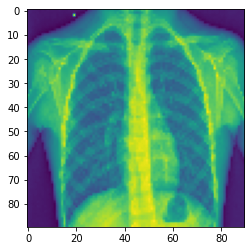

0


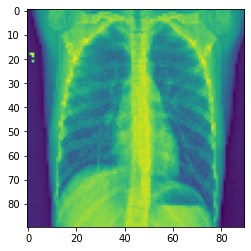

0


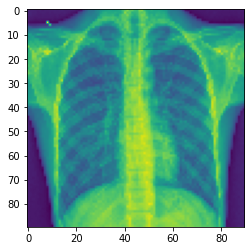

0


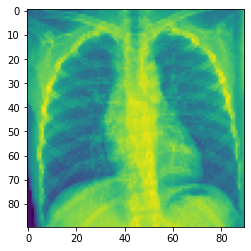

0


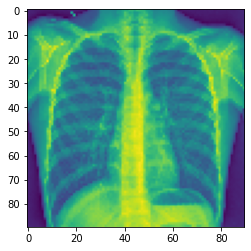

0


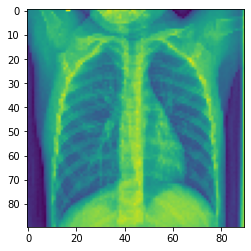

0


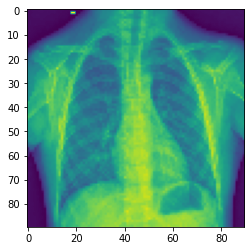

0


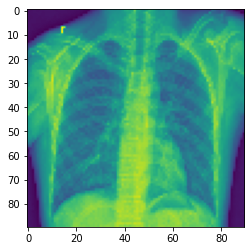

0


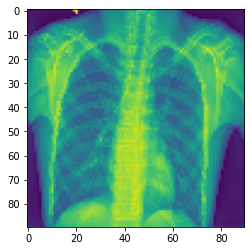

0


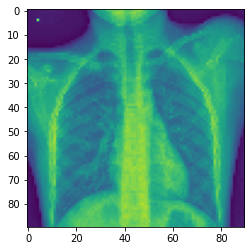

In [190]:
DATADIR="G:/chest_xray/train"
CATEGORIES=["NORMAL","PNEUMONIA"]
IMG_SIZE=90
training_data=[]
median_filter1=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR,category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                img1=np.array(img_array)
                median_filter=cv2.medianBlur(img1,5)
                median_resize=cv2.resize(median_filter,(IMG_SIZE,IMG_SIZE))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
                median_filter1.append([median_resize,class_num])
                
            except Exception as e:
                pass
create_training_data()
for sample in median_filter1[ :10]:
    print(sample[1])
    plt.imshow(sample[0])
    plt.show()

In [187]:
import random
random.shuffle(training_data)

0


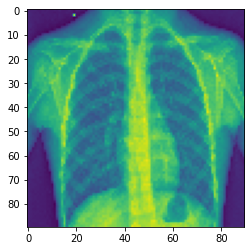

0


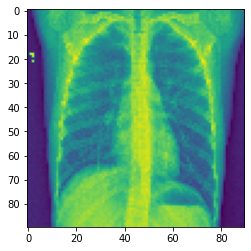

0


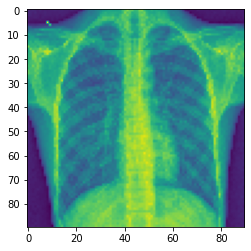

0


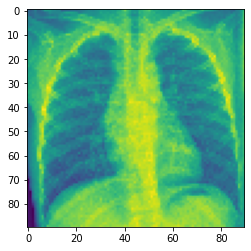

0


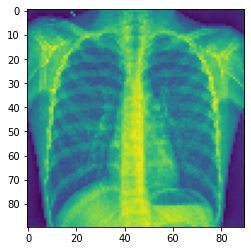

0


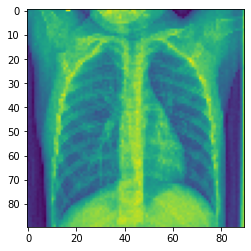

0


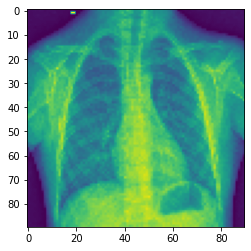

0


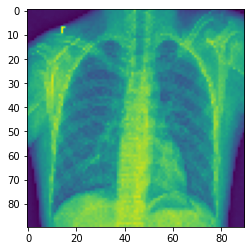

0


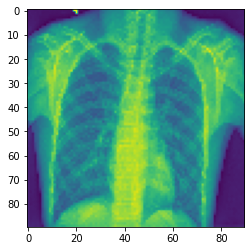

0


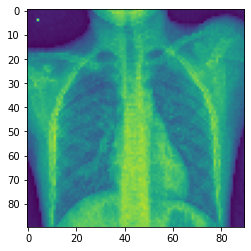

In [191]:
for sample in training_data[ :10]:
    print(sample[1])
    plt.imshow(sample[0])
    plt.show()

In [192]:
X=[]
y=[]
for features,labels in median_filter1:
    X.append(features)
    y.append(labels)
X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)
y=np.array(y).reshape(-1,1)

print(X.shape)
print(y.shape)

(5840, 90, 90, 1)
(5840, 1)


In [184]:
import pickle
pickle_out=open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out=open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

pickle_in=open("X.pickle","rb")
X=pickle.load(pickle_in)

In [185]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D
import pickle
X=pickle.load(open("X.pickle","rb"))
y=pickle.load(open("y.pickle","rb"))
y=np.array(y)
X=X/255.0
#X=X.reshape(-1,90,90,1)
model=Sequential()
model.add(Conv2D(64, (3,3),input_shape=(90,90,1)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))
model.add(Dense(32))
model.add(Activation("relu"))
model.add(Dense(1))
model.add(Activation("sigmoid"))
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
model.fit(X, y,epochs=8,validation_split=0.1)
model.save("lungs-model")

Epoch 1/8
165/165 [==============================] - 69s 420ms/step - loss: 0.3307 - accuracy: 0.8493 - val_loss: 0.1872 - val_accuracy: 0.9195
Epoch 2/8
 25/165 [===>..........................] - ETA: 57s - loss: 0.1682 - accuracy: 0.9262

KeyboardInterrupt: 

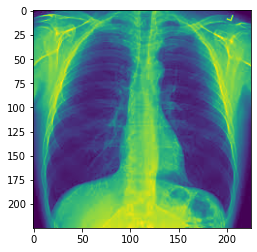

[[0.]]
NORMAL


In [21]:
import cv2
import tensorflow 
CATEGORIES=["NORMAL","PNEUMONIA"]
def prepare(filepath):
    img_array=cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
    #filtered=cv2.medianBlur(img_array,5)
    plt.imshow(img_array)
    plt.show()
    resized=cv2.resize(img_array,(90,90))
    return resized.reshape(-1,90,90,1)
model=tf.keras.models.load_model("lungs-model")


prediction = model.predict([prepare("G:/TRAINING_EXAMPLE/ln3.jpg")])
print(prediction)
print(CATEGORIES[int(prediction[0][0])])
    